Importamos las librerías que usaremos. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import missingno as ms

from sklearn.preprocessing import normalize
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings('ignore')

Importaremos de esta manera los archivos csv donde encontraremos la data que nos interesa. 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Explicaremos las variables que están dentro de la data**

**Pclass**: Status socioeconómico 1st = ClaseAlta 2nd=ClaseMedia 3rd=ClaseBaja 

**SibSp**: El dataset define relaciones familiares, es decir, nos dice el número de hermanos / espos@s dentro del Titanic.

**Parch**: Número de padres / hijos dentro del Titanic

**Spouse** = marido / Mujer (se obvia novias o enamoradas)

**parch**: También se defines relaciones familiares en general de esta forma. Por ejemplo, algunos niños viajan solamente con su nana, por eso en esta variable tendrían 0.

**Survival**: Si la persona sobrevivió o no.	0 = No, 1 = Sí

**Pclass***: La clase de ticket que sacó el pasajero   1 = 1st, 2 = 2nd, 3 = 3rd

**Embarked**: Puerta de embarcación,	C = Cherbourg, Q = Queenstown, S = Southampton

**Cabin**: El número de cabina

In [9]:
print('Para la data en train, tendremos:')
print('--------------------------------------------------------------------------------------------')
for n in train.columns:
    print('El número de valores diferentes en la columna', n, 'es:', len(train[n].unique()))
print('--------------------------------------------------------------------------------------------')
#Ahora buscaremos el número de valores nulos dentro de la data
for n in train.columns:
    if train[n].isnull().values.any() == True:
        print('Existen' , train[n].isna().sum(), 'valores nulos en la columna', n)

Para la data en train, tendremos:
--------------------------------------------------------------------------------------------
El número de valores diferentes en la columna PassengerId es: 891
El número de valores diferentes en la columna Survived es: 2
El número de valores diferentes en la columna Pclass es: 3
El número de valores diferentes en la columna Name es: 891
El número de valores diferentes en la columna Sex es: 2
El número de valores diferentes en la columna Age es: 89
El número de valores diferentes en la columna SibSp es: 7
El número de valores diferentes en la columna Parch es: 7
El número de valores diferentes en la columna Ticket es: 681
El número de valores diferentes en la columna Fare es: 248
El número de valores diferentes en la columna Cabin es: 148
El número de valores diferentes en la columna Embarked es: 4
--------------------------------------------------------------------------------------------
Existen 177 valores nulos en la columna Age
Existen 687 valores n

In [10]:
print('Para la data de test, tendremos:')
print('-------------------------------------------------------------------------------')
for n in test.columns:
    print('El número de valores diferentes en la columna', n, 'es:', len(test[n].unique()))
print('-------------------------------------------------------------------------------')
#Ahora buscaremos el número de valores nulos dentro de la data
for n in test.columns:
    if test[n].isnull().values.any() == True:
        print('Existen' , test[n].isna().sum(), 'valores nulos en la columna', n)

Para la data de test, tendremos:
-------------------------------------------------------------------------------
El número de valores diferentes en la columna PassengerId es: 418
El número de valores diferentes en la columna Pclass es: 3
El número de valores diferentes en la columna Name es: 418
El número de valores diferentes en la columna Sex es: 2
El número de valores diferentes en la columna Age es: 80
El número de valores diferentes en la columna SibSp es: 7
El número de valores diferentes en la columna Parch es: 8
El número de valores diferentes en la columna Ticket es: 363
El número de valores diferentes en la columna Fare es: 170
El número de valores diferentes en la columna Cabin es: 77
El número de valores diferentes en la columna Embarked es: 3
-------------------------------------------------------------------------------
Existen 86 valores nulos en la columna Age
Existen 1 valores nulos en la columna Fare
Existen 327 valores nulos en la columna Cabin


## Missingno: Una forma más interactiva de ver mis nulos.

Esta librería nos grafica nuestro dataframe de tal manera en la que vemos qué columnas tienen datos vacíos. Esto es representado por los espacios en blanco que tenemos. Es más intuitivo y fácil de mapear cuáles son los problemas de los nulos dentro de nuestro dataset. 

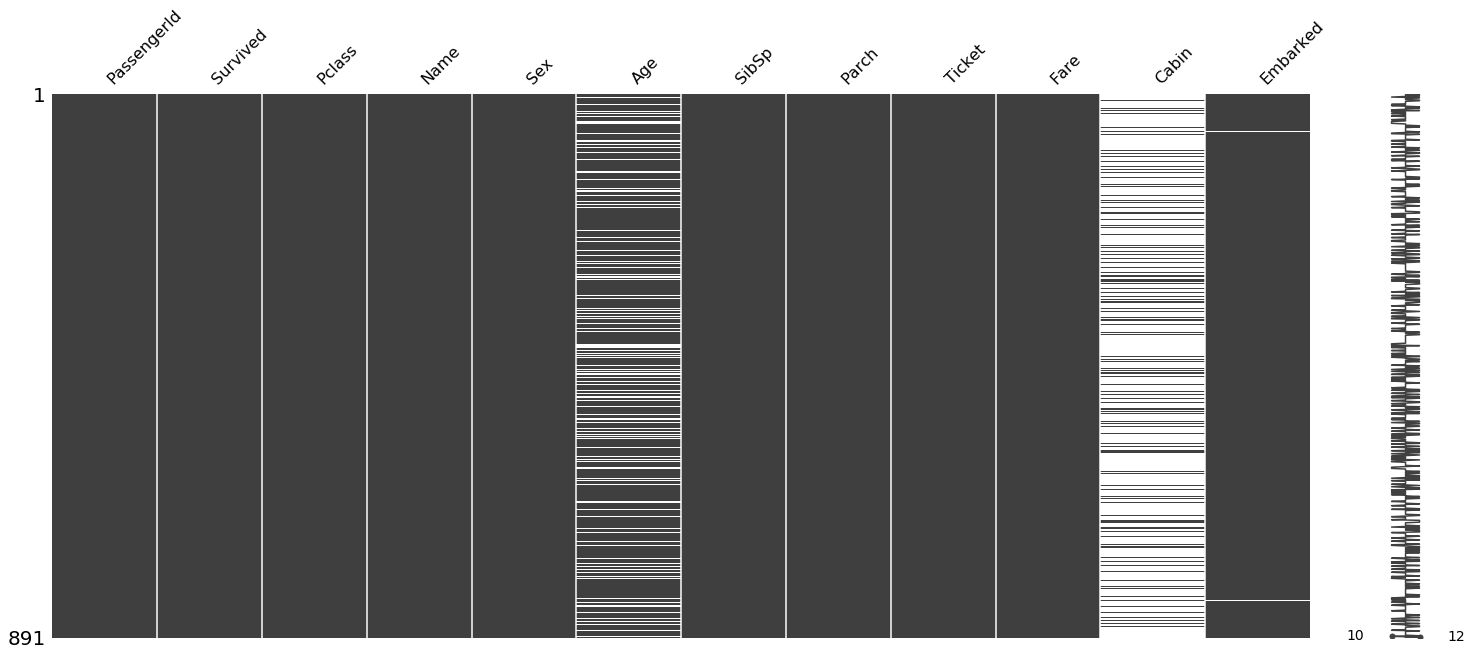

In [13]:
ms.matrix(train)

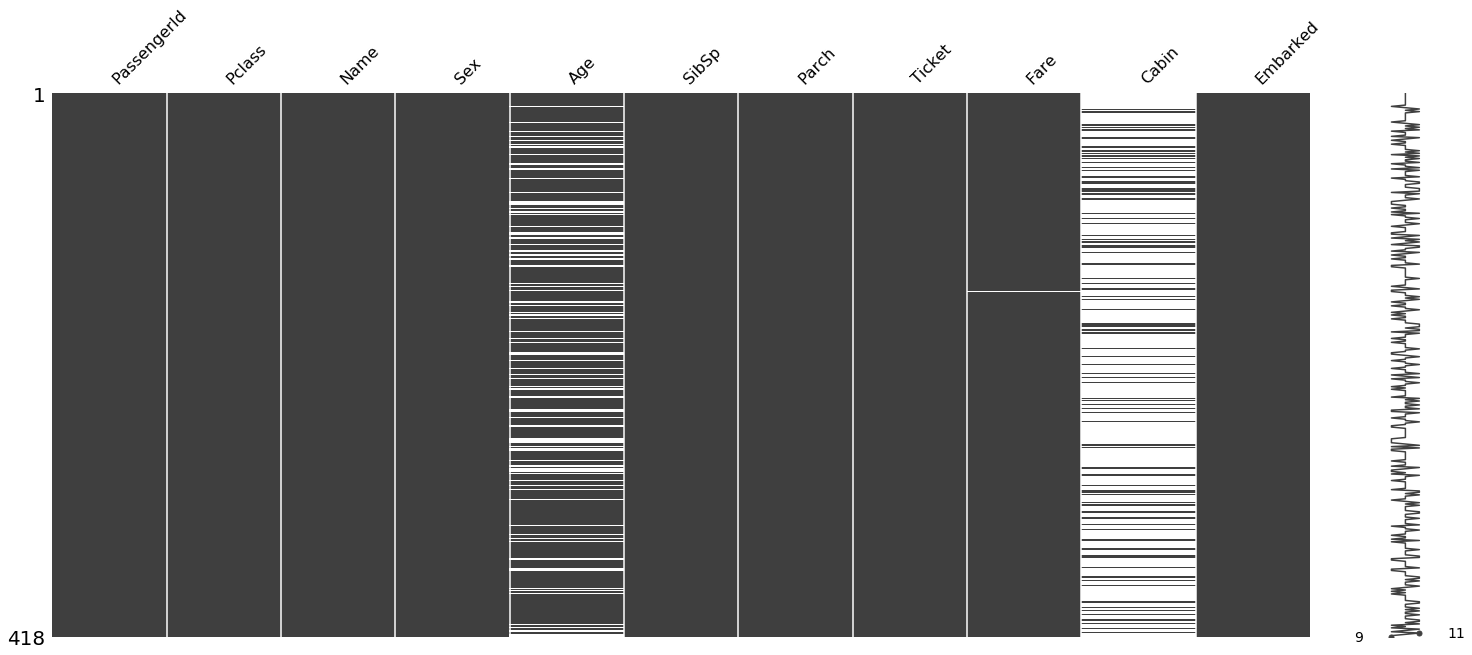

In [14]:
ms.matrix(test)

**Eliminaremos** los valores que nos parecen **irrelevantes** para predecir si una persona sobrevive o no dentro del Titanic. En este caso, intuimos que son:

- Nombre 

- Ticket

- PassengerId

In [15]:
train = train.drop(['Name','Ticket','PassengerId'], axis = 1)
test = test.drop(['Name','Ticket','PassengerId'], axis = 1)

## Reemplazando Nulos:

Ahora llenaremos los valores NaN de las columnas Age y Embarked. En la columna Age llenaremos de manera random definiendo un intervalo en el que nuestra data va iterar. Ese intervalo será definido por **(media +- DesviaciónEstandar)**

In [8]:
#First, we will create a copy:
train_bf = train.copy()
test_bf = test.copy()

In [16]:
print("La edad media de nuestro train dataset es:",train['Age'].mean(),"\nLa desviación estandar de la edad de nuestro train dataset es:",train['Age'].std())
print("La edad media de nuestro test dataset es:",test['Age'].mean(),"\nLa desviación estándar de la edad de nuestro test es:",test['Age'].std())

La edad media de nuestro train dataset es: 29.69911764705882 
La desviación estandar de la edad de nuestro train dataset es: 14.526497332334044
La edad media de nuestro test dataset es: 30.272590361445783 
La desviación estándar de la edad de nuestro test es: 14.18120923562442


In [10]:
#Crearemos una función para llenar de manera random dentro del intervalo de la media y desv stand (std)
def llena_nan_con_media_y_std(df,col='Age'):
    nan = df[df[col].isna()] #el dataset de los que tienen la columna (col = 'Age' ) con valores nulos
    min_ = df[col].mean() - df[col].std() #El comienzo de nuestro intervalo, la media menos la desv. estandar.
    max_ = df[col].mean() + df[col].std() #El final de nuestro intervalo, la media más la desv. estandar.
    for i in nan.index: #Para cada i en los index de mi data nula
        random_num = random.uniform(min_,max_) #randomizo dentro de los intervalos que quiero
        df[col].loc[i] = random_num #Reemplazo los valores dentro de mi data original.

In [11]:
fill_nan_w_mean_std(train) #Aplico la función para train
fill_nan_w_mean_std(test) #Aplico la función para test

In [12]:
#We will transform the values to integers
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

Now we can visualize if there is a difference on the fill values:

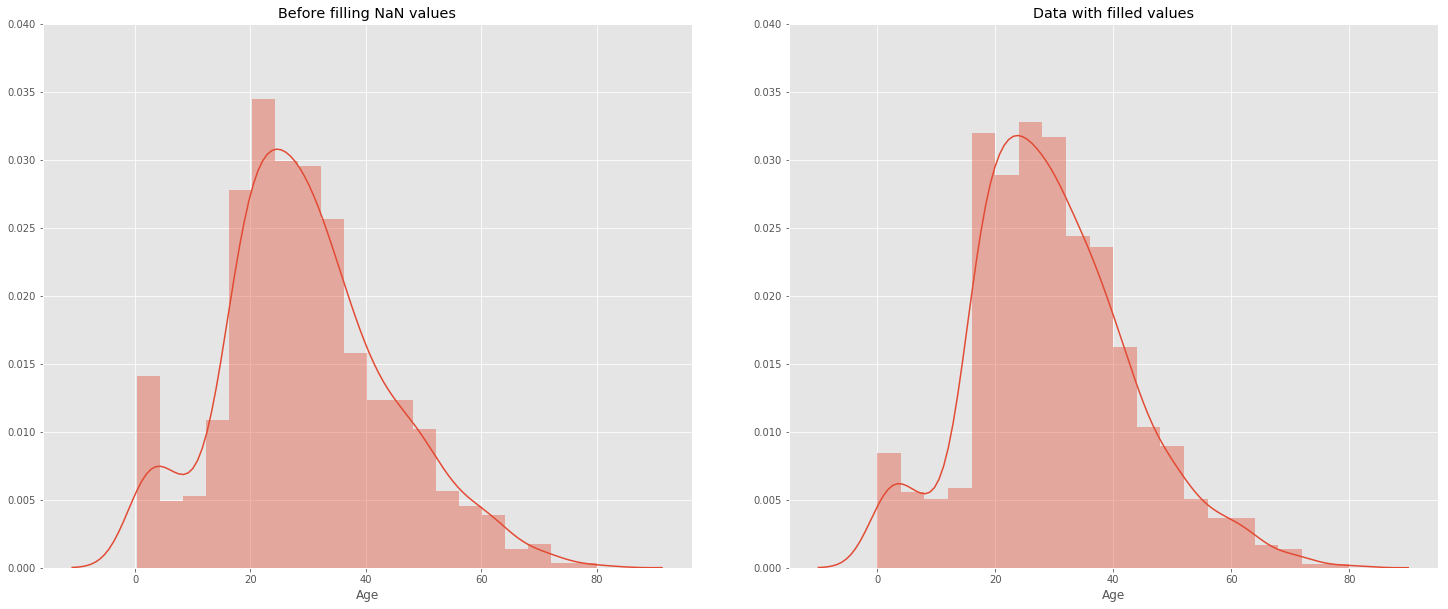

In [13]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (25,10))
fig.subplots_adjust(hspace=0.6, wspace=0.15)
ax = fig.add_subplot(1,2,1)
ax.set_ylim([0,0.04])
ax.set_title('Before filling NaN values')
sns.distplot(train_bf['Age'].dropna(), bins=20)
ax_2 = fig.add_subplot(1,2,2)
ax_2.set_ylim([0,0.04])
ax_2.set_title('Data with filled values')
sns.distplot(train['Age'],bins=20)

We can say that there is no significative difference after we fill the nan values. The distribution is almost the same. But have two peaks. Later we will deal with that.

Now we have to deal with nan values in embarked column on train dataframe and with nan ones in Fare column on test dataframe. 

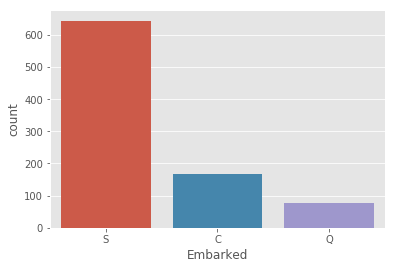

In [14]:
#First, we have to visualize the Embarked column in train data: 
sns.countplot(x='Embarked',data=train)

In [15]:
#Now we see that most of the data embarked from S port we can fill with this class
nan_emb = train[train['Embarked'].isna()]
for i in nan_emb.index:
    train['Embarked'].loc[i] = 'S'

In [16]:
#We deal with that one nan value in fare column of test data
nan_fare = test[test['Fare'].isna()]
for i in nan_fare.index:
    test['Fare'].loc[i] = test['Fare'].mean()

## We can create other features from the data

We have seen there are two variables with family relations (SibSp & Parch) so why we can not create a variable that resumen the family member for one person? And also count the people who travel alone in the ship. 

In [17]:
train['Family_members'] = train['SibSp'] + train['Parch'] + 1 #him/her
test['Family_members'] = test['SibSp'] + test['Parch'] + 1

#Let's create the Alone feature
train['not_Alone'] = 0 #0 if he/she is alone
train['not_Alone'].loc[train['Family_members'] > 1] = 1

test['not_Alone'] = 0 #1 if he/she is alone
test['not_Alone'].loc[train['Family_members'] > 1] = 1

In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family_members,not_Alone
0,0,3,male,22,1,0,7.2500,NaN,S,2,1
1,1,1,female,38,1,0,71.2833,C85,C,2,1
2,1,3,female,26,0,0,7.9250,NaN,S,1,0
3,1,1,female,35,1,0,53.1000,C123,S,2,1
4,0,3,male,35,0,0,8.0500,NaN,S,1,0


In [19]:
#We will create a third string in gender: child. Because in a catastrophe like this children are first.
def agg_child(df,col='Age'):
    mask = (df[col] <= 15)
    df.loc[mask,'Sex'] = 'child'

#We apply the function
agg_child(train)
agg_child(test)

Now lets deal with cabin values. Since there are too many NaN values we can binarize if the passengers have Cabin or not.

In [20]:
def agg_cabin_bin(df,col='Cabin'):
    df['with_Cabin'] = 0
    mask = (df[col].isna() == False)
    df.loc[mask,'with_Cabin'] = 1
#0 if the passenger had not a Cabin, 1 if he has a cabin

In [21]:
agg_cabin_bin(train)
agg_cabin_bin(test)

del train['Cabin']
del test['Cabin']

In [22]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,not_Alone,with_Cabin
0,0,3,male,22,1,0,7.2500,S,2,1,0
1,1,1,female,38,1,0,71.2833,C,2,1,1
2,1,3,female,26,0,0,7.9250,S,1,0,0
3,1,1,female,35,1,0,53.1000,S,2,1,1
4,0,3,male,35,0,0,8.0500,S,1,0,0


## Data Visualization

Text(0.5, 1.0, 'Sex vs Survived')

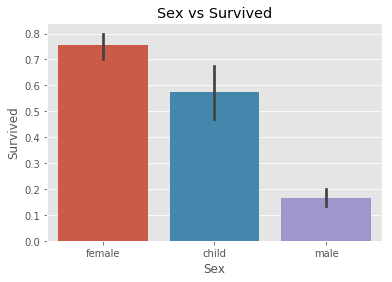

In [23]:
sns.barplot(x='Sex',y='Survived',data=train, order=['female','child','male'])
plt.title('Sex vs Survived')

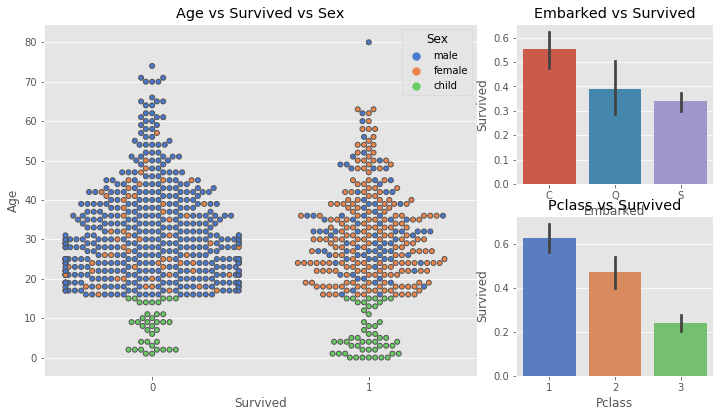

In [24]:
gs = plt.GridSpec(2,3,wspace=0.45, hspace=0.8)
plt.figure(figsize=(12,10))
ax1 = plt.subplot2grid((3,3),(0,0),rowspan=2,colspan=2)
plt.title('Age vs Survived vs Sex')
sns.swarmplot(x = 'Survived',y='Age', 
              data=train, linewidth=1,hue='Sex', palette = 'muted')
ax2 = plt.subplot2grid((3,3),(0,2))
plt.title('Embarked vs Survived')
sns.barplot(x='Embarked',y='Survived',
            data=train,order=['C','Q','S'])
ax3 = plt.subplot2grid((3,3),(1,2))
plt.title('Pclass vs Survived')
sns.barplot(x='Pclass',y='Survived',
            data=train, palette = 'muted')

In [25]:
#Now we can say that Embarked class/Pclass/sex have priorities for survive. So we can transform the categorical data to numbers
cat_to_nums = {"Embarked":  {"S": 0, "Q": 1, "C":2},
               "Sex": {"male":0,"child":1,"female":2}}
#We will use replace to convert the values
train.replace(cat_to_nums, inplace = True)

In [26]:
test.replace(cat_to_nums, inplace = True)

In [27]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,not_Alone,with_Cabin
0,0,3,0,22,1,0,7.2500,0,2,1,0
1,1,1,2,38,1,0,71.2833,2,2,1,1
2,1,3,2,26,0,0,7.9250,0,1,0,0
3,1,1,2,35,1,0,53.1000,0,2,1,1
4,0,3,0,35,0,0,8.0500,0,1,0,0


## Finding Correlations on data:

In [28]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,not_Alone,with_Cabin
Survived,1.000000,-0.338481,0.553937,-0.070341,-0.035322,0.081629,0.257307,0.167675,0.016639,0.203367,0.316912
Pclass,-0.338481,1.000000,-0.145327,-0.329568,0.083081,0.018443,-0.549500,-0.162098,0.065997,-0.135207,-0.725541
Sex,0.553937,-0.145327,1.000000,-0.100406,0.160525,0.262375,0.195142,0.098181,0.240792,0.322902,0.152469
Age,-0.070341,-0.329568,-0.100406,1.000000,-0.209756,-0.163151,0.093085,0.019951,-0.224869,-0.163788,0.229731
SibSp,-0.035322,0.083081,0.160525,-0.209756,1.000000,0.414838,0.159651,-0.068230,0.890712,0.584471,-0.040460
Parch,0.081629,0.018443,0.262375,-0.163151,0.414838,1.000000,0.216225,-0.039798,0.783111,0.583398,0.036987
Fare,0.257307,-0.549500,0.195142,0.093085,0.159651,0.216225,1.000000,0.224719,0.217138,0.271832,0.482075
Embarked,0.167675,-0.162098,0.098181,0.019951,-0.068230,-0.039798,0.224719,1.000000,-0.066516,0.063532,0.160196
Family_members,0.016639,0.065997,0.240792,-0.224869,0.890712,0.783111,0.217138,-0.066516,1.000000,0.690922,-0.009175
not_Alone,0.203367,-0.135207,0.322902,-0.163788,0.584471,0.583398,0.271832,0.063532,0.690922,1.000000,0.158029


In [29]:
def correlation_heatmap(df): #from "A Data Science Framework: To Achieve 99% Accuracy" kernel by LD Freedman
    s , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    g = sns.heatmap(df.corr(), cmap = colormap,square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax, annot=True,linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 })
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

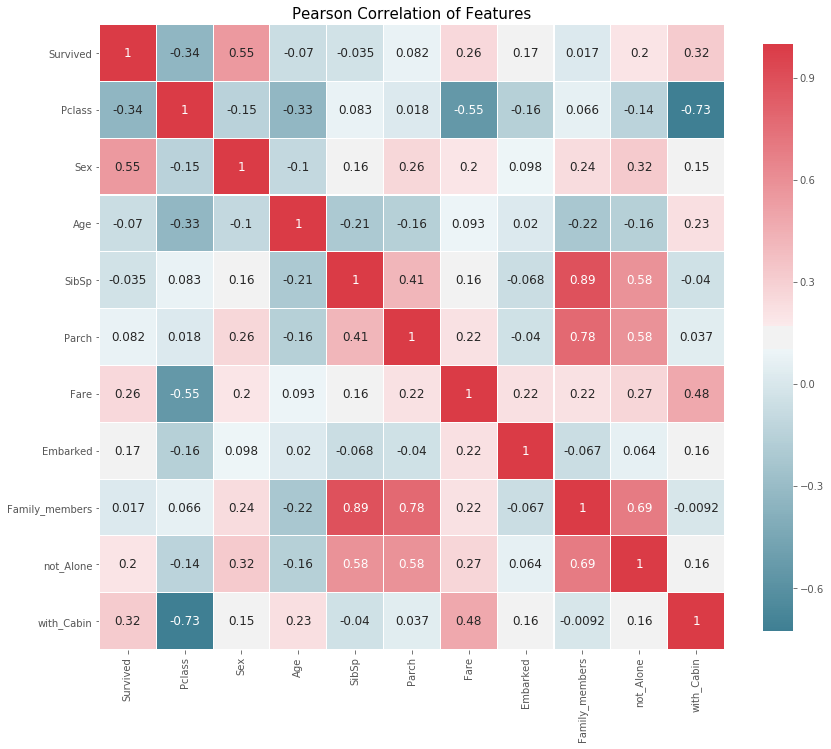

In [30]:
correlation_heatmap(train)

## Normalizing data
https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc


In [31]:
# Normalize 'Fare' & 'Age' values for test and train dataset
X = [train['Fare'],
     train['Age']]
X_normalize = normalize(X)

X_2 = [test['Fare'],
      test['Age']]
X_2_normalize = normalize(X_2)

train = train.assign(Fare = X_normalize[0])

train = train.assign(Age = X_normalize[1])

test = test.assign(Fare = X_2_normalize[0])

test = test.assign(Age = X_2_normalize[1])

In [32]:
#Now we have all numerical values!
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_members,not_Alone,with_Cabin
0,0,3,0,0.022735,1,0,0.004103,0,2,1,0
1,1,1,2,0.039269,1,0,0.040344,2,2,1,1
2,1,3,2,0.026868,0,0,0.004485,0,1,0,0
3,1,1,2,0.036169,1,0,0.030053,0,2,1,1
4,0,3,0,0.036169,0,0,0.004556,0,1,0,0


# Machine Learning

-Logistic regression vs SVM

In [33]:
X_train = train.loc[:,'Pclass':]
y_train = train.loc[:,'Survived']
X_test_final = test

### Logistic Regression  (81.7)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV #We will use gridsearchCV

#Dividing the data before tuning the model
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train,test_size = 0.3, 
                                                    random_state=21)

In [35]:
#Logistic Regression:

logreg = LogisticRegression()

param_grid = {'C' : [x for x in range(1,5000,5)]  }
#finding the best parameter:
searcher = GridSearchCV(logreg, param_grid)

searcher.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256, 261, 266, 271, 276, 281, 286, 291, 296, 301,...16, 4921, 4926, 4931, 4936, 4941, 4946, 4951, 4956, 4961, 4966, 4971, 4976, 4981, 4986, 4991, 4996]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 4581}
Best CV accuracy 0.8057784911717496
Test accuracy of best grid search hypers: 0.8171641791044776


In [37]:
pred = searcher.predict(X_test_final)

## Support Vector Machines: 
#### Support Vector Classifier (81,7)

In [38]:
from sklearn.svm import SVC
svc = SVC()
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1,1,10,100],
              'C':[x for x in np.linspace(0.1,10,100)]}
ssp = GridSearchCV(svc,parameters)

ssp.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3000000000000003, 1.4000000000000001, 1.5000000000000002, 1.6, 1.7000000000000002, 1.8000000000000003, 1.9000000000000...8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.700000000000001, 9.8, 9.9, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
# Report the best parameters and the corresponding score
print("Best CV params", ssp.best_params_)
print("Best CV accuracy", ssp.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 1.1, 'gamma': 0.1}
Best CV accuracy 0.8186195826645265
Test accuracy of best grid search hypers: 0.8171641791044776


In [40]:
pred23 = ssp.predict(X_test)
len(y_test)

268

In [41]:
y_test

617    0
379    0
725    0
826    0
450    0
147    0
698    0
397    0
525    0
505    0
180    0
255    1
433    0
232    0
405    0
131    0
723    0
16     0
516    1
128    1
119    0
383    1
536    0
126    0
44     1
618    1
65     1
627    1
567    0
426    1
      ..
750    1
375    1
148    0
381    1
823    1
439    0
52     1
290    1
713    0
597    0
351    0
822    0
398    0
173    0
142    1
200    0
441    0
68     1
170    0
272    1
648    0
805    0
178    0
714    0
520    1
394    1
463    0
13     0
12     0
649    1
Name: Survived, Length: 268, dtype: int64

## Stochastic Gradient Descent Classifier (81,7)


In [42]:
from sklearn.linear_model import SGDClassifier

In [43]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1','l2']}
searcher_sgd = GridSearchCV(linear_classifier, parameters, cv=10)
searcher_sgd.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 4581}
Best CV accuracy 0.8057784911717496
Test accuracy of best grid search hypers: 0.8171641791044776


## Decision Trees Classifier (0.79)

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz #importing the module
from sklearn.metrics import accuracy_score

In [45]:
#Finding our optimize max_depth
for i in range(1,18):
    tree_clf = DecisionTreeClassifier(max_depth=i)
    tree_clf.fit(X_train,y_train)
    y_pred = tree_clf.predict(X_test)
    print("Test accuracy of the Decision Trees model:", accuracy_score(y_pred,y_test), "for max_depth: ", i)

Test accuracy of the Decision Trees model: 0.7873134328358209 for max_depth:  1
Test accuracy of the Decision Trees model: 0.8022388059701493 for max_depth:  2
Test accuracy of the Decision Trees model: 0.832089552238806 for max_depth:  3
Test accuracy of the Decision Trees model: 0.835820895522388 for max_depth:  4
Test accuracy of the Decision Trees model: 0.8097014925373134 for max_depth:  5
Test accuracy of the Decision Trees model: 0.7985074626865671 for max_depth:  6
Test accuracy of the Decision Trees model: 0.8208955223880597 for max_depth:  7
Test accuracy of the Decision Trees model: 0.8171641791044776 for max_depth:  8
Test accuracy of the Decision Trees model: 0.8134328358208955 for max_depth:  9
Test accuracy of the Decision Trees model: 0.8171641791044776 for max_depth:  10
Test accuracy of the Decision Trees model: 0.7985074626865671 for max_depth:  11
Test accuracy of the Decision Trees model: 0.7798507462686567 for max_depth:  12
Test accuracy of the Decision Trees mod

In [46]:
#Basic Decision Tree model
tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X_train,y_train) #training the model

#Predicting with the model
y_pred = tree_clf.predict(X_test)

#We will try to evaluate the accuracy score
print("Test accuracy of the Decision Trees model:", accuracy_score(y_pred,y_test))

Test accuracy of the Decision Trees model: 0.8022388059701493


In [47]:
pred = tree_clf.predict(X_test_final)

## RANDOM FOREST MODEL  (0.81)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
#Random Forest Classifier model
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train,y_train)

#Predicting
y_pred = rnd_clf.predict(X_test)

#Evaluate the accuracy score
print("Test accuracy of the Decision Trees model:", accuracy_score(y_pred,y_test))

Test accuracy of the Decision Trees model: 0.8283582089552238


In [50]:
pred = rnd_clf.predict(X_test_final)

## Ensemble Method (all the models) [0.805]

In [51]:
from sklearn.ensemble import VotingClassifier

In [52]:
#We will now try an ensemble method
voting_clf = VotingClassifier(estimators = [('lr',searcher),('rf',rnd_clf),('svc',ssp),
                                            ('sgd',searcher_sgd),('dt',tree_clf)],
                             voting = 'hard')
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='w...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [53]:
y_pred = voting_clf.predict(X_test)

In [54]:
#Evaluate the accuracy score
print("Test accuracy of the Decision Trees model:", accuracy_score(y_pred,y_test))
pred = voting_clf.predict(X_test_final)

Test accuracy of the Decision Trees model: 0.8208955223880597


## AdaBoost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [56]:
adb_clf = AdaBoostClassifier(base_estimator = tree_clf,
                             n_estimators = 100)
adb_clf.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [57]:
y_pred = adb_clf.predict(X_test_final)
y_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

# Basic Neural Network

In [58]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

Using TensorFlow backend.


In [59]:
y_train2 = to_categorical(y_train)

In [60]:
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(100,activation='relu',input_shape = (n_cols,)))
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [61]:
model.fit(X_train, y_train2, epochs = 100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
623/623 [==============================] - 1s 1ms/step - loss: 0.6882 - acc: 0.5939
Epoch 2/100
623/623 [==============================] - 0s 60us/step - loss: 0.5930 - acc: 0.7352
Epoch 3/100
623/623 [==============================] - 0s 48us/step - loss: 0.5575 - acc: 0.7608
Epoch 4/100
623/623 [==============================] - 0s 54us/step - loss: 0.5314 - acc: 0.7785
Epoch 5/100
623/623 [==============================] - 0s 55us/step - loss: 0.5129 - acc: 0.7801
Epoch 6/100
623/623 [==============================] - 0s 56us/step - loss: 0.4997 - acc: 0.7833
Epoch 7/100
623/623 [==============================] - 0s 56us/step - loss: 0.4896 - acc: 0.7833
Epoch 8/100
623/623 [==============================] - 0s 50us/step - loss: 0.4814 - acc: 0.7897
Epoch 9/100
623/623 [==============================] - 0s 52us/step - loss: 0.4757 - acc: 0.7865
Epoch 10/100
623/623 [==============================] - 0s 56us/step - loss: 0.4

In [62]:
preds = model.predict(X_test)